In [4]:
import tensorflow as tf
import os
import pathlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from tensorflow import keras
from tensorflow.keras import models, layers, optimizers
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Check for TensorFlow GPU access
print(tf.config.list_physical_devices())

# See TensorFlow version
print(tf.__version__)

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
2.13.0


In [5]:
base_dir = '../data/fruits-360/'
test_dir = os.path.join(base_dir, 'Test')
train_dir = os.path.join(base_dir, 'Training')

train_dir = pathlib.Path(train_dir)
test_dir = pathlib.Path(test_dir) 

#Img size

img_height = 299
img_width = 299

In [6]:
# Data preprocessing - ImageDataGenerator

# Normalize the pixels in the train data images, resize and augment the data
train_datagen = ImageDataGenerator(
    rescale=1./255,# Image augmentaion 
    shear_range=0.2,
    zoom_range=0.2, # Zoom in on image by 20%
    horizontal_flip=True, #  Flip the image horizontally
    validation_split=0.2
    ) # Split 20% of the data for validation

# Normalize the test data images
test_datagen = ImageDataGenerator(rescale=1./255) 

#flow_from_directory takes the directory containing the images, target size, 
# batch size, class mode as parameters

#Preprocess the training data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=32,
    shuffle=True,
    class_mode='categorical',
    subset='training') # Set as training data

#Preprocess the validation data
validation_generator = train_datagen.flow_from_directory(
    train_dir, # Same directory as training data
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode='categorical',
    subset='validation') # Set as validation data

#Preprocess the testing data
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode='categorical')

Found 54190 images belonging to 131 classes.
Found 13502 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


In [7]:
# Only 13 clases - 10% of the data

# Data preprocessing - ImageDataGenerator

# Normalize the pixels in the train data images, resize and augment the data
train_datagen = ImageDataGenerator(
    rescale=1./255,# Image augmentaion 
    shear_range=0.2,
    zoom_range=0.2, # Zoom in on image by 20%
    horizontal_flip=True, #  Flip the image horizontally
    validation_split=0.2) # Split 20% of the data for validation

# Normalize the test data images
test_datagen = ImageDataGenerator(rescale=1./255) 
#flow_from_directory takes the directory containing the images, target size, 
# batch size, class mode as parameters

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=32,
    shuffle=True,
    classes=['Apple Red 2', 'Avocado', 'Banana', 'Cherry 2', 'Kiwi', 'Lemon', 'Mandarine', 'Peach', 'Pineapple', 'Raspberry', 'Strawberry', 'Tomato 1', 'Watermelon'],
    class_mode='categorical',
    subset='training') # Set as training data

validation_generator = train_datagen.flow_from_directory(
    train_dir, # Same directory as training data
    target_size=(img_height, img_width),
    batch_size=32,
    classes=['Apple Red 2', 'Avocado', 'Banana', 'Cherry 2', 'Kiwi', 'Lemon', 'Mandarine', 'Peach', 'Pineapple', 'Raspberry', 'Strawberry', 'Tomato 1', 'Watermelon'],
    class_mode='categorical',
    subset='validation') # Set as validation data

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=32,
    classes=['Apple Red 2', 'Avocado', 'Banana', 'Cherry 2', 'Kiwi', 'Lemon', 'Mandarine', 'Peach', 'Pineapple', 'Raspberry', 'Strawberry', 'Tomato 1', 'Watermelon'],
    class_mode='categorical')

Found 5421 images belonging to 13 classes.
Found 1351 images belonging to 13 classes.
Found 2268 images belonging to 13 classes.


In [11]:
from tensorflow.keras import layers, models
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow import keras

# Create the model based on the InceptionV3 architecture

# Load InceptionV3 model with weights from ImageNet, excluding the top layer
conv_base = keras.applications.InceptionV3(
    include_top=False,
    weights="imagenet",
    input_shape=(img_height, img_width, 3)
)

conv_base.trainable = False  # Freeze the base model layers

# Add custom layers on top of the base model
InceptionV3_model = conv_base.output
pool = GlobalAveragePooling2D()(InceptionV3_model)
dense_1 = layers.Dense(512, activation='relu')(pool)

# Adjust the output layer to match the number of classes in your dataset
output = layers.Dense(13, activation='softmax')(dense_1)  # Change 131 to 13

# Create the complete model
model_inception = models.Model(inputs=conv_base.input, outputs=output)

# Display the model summary to verify changes
model_inception.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 299, 299, 3)]        0         []                            
                                                                                                  
 conv2d_94 (Conv2D)          (None, 149, 149, 32)         864       ['input_2[0][0]']             
                                                                                                  
 batch_normalization_94 (Ba  (None, 149, 149, 32)         96        ['conv2d_94[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_94 (Activation)  (None, 149, 149, 32)         0         ['batch_normalization_94

                                                                                                  
 activation_29 (Activation)     (None, 17, 17, 96)   0           ['batch_normalization_29[0][0]'] 
                                                                                                  
 max_pooling2d_2 (MaxPooling2D)  (None, 17, 17, 288)  0          ['mixed2[0][0]']                 
                                                                                                  
 mixed3 (Concatenate)           (None, 17, 17, 768)  0           ['activation_26[0][0]',          
                                                                  'activation_29[0][0]',          
                                                                  'max_pooling2d_2[0][0]']        
                                                                                                  
 conv2d_34 (Conv2D)             (None, 17, 17, 128)  98304       ['mixed3[0][0]']                 
          

                                                                  'activation_33[0][0]',          
                                                                  'activation_38[0][0]',          
                                                                  'activation_39[0][0]']          
                                                                                                  
 conv2d_44 (Conv2D)             (None, 17, 17, 160)  122880      ['mixed4[0][0]']                 
                                                                                                  
 batch_normalization_44 (BatchN  (None, 17, 17, 160)  480        ['conv2d_44[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_44 (Activation)     (None, 17, 17, 160)  0           ['batch_normalization_44[0][0]'] 
          

                                                                                                  
 batch_normalization_54 (BatchN  (None, 17, 17, 160)  480        ['conv2d_54[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_54 (Activation)     (None, 17, 17, 160)  0           ['batch_normalization_54[0][0]'] 
                                                                                                  
 conv2d_55 (Conv2D)             (None, 17, 17, 160)  179200      ['activation_54[0][0]']          
                                                                                                  
 batch_normalization_55 (BatchN  (None, 17, 17, 160)  480        ['conv2d_55[0][0]']              
 ormalization)                                                                                    
          

                                                                                                  
 conv2d_65 (Conv2D)             (None, 17, 17, 192)  258048      ['activation_64[0][0]']          
                                                                                                  
 batch_normalization_65 (BatchN  (None, 17, 17, 192)  576        ['conv2d_65[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_65 (Activation)     (None, 17, 17, 192)  0           ['batch_normalization_65[0][0]'] 
                                                                                                  
 conv2d_61 (Conv2D)             (None, 17, 17, 192)  147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_66

                                                                                                  
 activation_73 (Activation)     (None, 17, 17, 192)  0           ['batch_normalization_73[0][0]'] 
                                                                                                  
 conv2d_70 (Conv2D)             (None, 17, 17, 192)  147456      ['mixed7[0][0]']                 
                                                                                                  
 conv2d_74 (Conv2D)             (None, 17, 17, 192)  258048      ['activation_73[0][0]']          
                                                                                                  
 batch_normalization_70 (BatchN  (None, 17, 17, 192)  576        ['conv2d_70[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_nor

 conv2d_84 (Conv2D)             (None, 8, 8, 192)    245760      ['average_pooling2d_7[0][0]']    
                                                                                                  
 batch_normalization_76 (BatchN  (None, 8, 8, 320)   960         ['conv2d_76[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_78 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_78[0][0]'] 
                                                                                                  
 activation_79 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_79[0][0]'] 
                                                                                                  
 activation_82 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_82[0][0]'] 
          

                                                                                                  
 activation_88 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_88[0][0]'] 
                                                                                                  
 activation_91 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_91[0][0]'] 
                                                                                                  
 activation_92 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_92[0][0]'] 
                                                                                                  
 batch_normalization_93 (BatchN  (None, 8, 8, 192)   576         ['conv2d_93[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activatio

In [12]:
# Compile the model
model_inception.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [13]:
with tf.device("/device:GPU:0"):
    history = model_inception.fit(
        train_generator,
        epochs=5,
        validation_data=validation_generator,
        verbose = 1,
        callbacks=[EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)])
    
# Save the model
def save_model(model, seed):
    model.save(f"../models/inceptionv3-{seed}")
    
save_model(model_inception, 4)

Epoch 1/5


2024-09-04 23:02:29.270042: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


170/170 [==============================] - ETA: 0s - loss: 0.1620 - accuracy: 0.9594

2024-09-04 23:03:34.714195: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


170/170 [==============================] - 81s 460ms/step - loss: 0.1620 - accuracy: 0.9594 - val_loss: 0.0392 - val_accuracy: 0.9889
Epoch 2/5
170/170 [==============================] - 60s 353ms/step - loss: 0.0043 - accuracy: 0.9994 - val_loss: 0.0377 - val_accuracy: 0.9859
Epoch 3/5
170/170 [==============================] - 60s 352ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0310 - val_accuracy: 0.9919
Epoch 4/5
170/170 [==============================] - 59s 344ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0250 - val_accuracy: 0.9911
Epoch 5/5
170/170 [==============================] - 60s 354ms/step - loss: 0.0015 - accuracy: 0.9996 - val_loss: 0.3726 - val_accuracy: 0.9289
INFO:tensorflow:Assets written to: ../models/inceptionv3-4/assets


INFO:tensorflow:Assets written to: ../models/inceptionv3-4/assets


In [14]:
# Test the model

loss, accuracy = model_inception.evaluate(test_generator)
print(f'Test accuracy: {accuracy:.3f}, Test loss: {loss:.3f}')

71/71 [==============================] - 14s 189ms/step - loss: 0.3689 - accuracy: 0.9303
Test accuracy: 0.930, Test loss: 0.369


In [15]:
model_inception = keras.models.load_model('../models/inceptionv3-4')
class_dict = test_generator.class_indices # a dictionary of the form class name: class index

#model_inception = keras.models.load_model('../models/inceptionv3-3-13classes')
#class_dict = test_generator.class_indices # a dictionary of the form class name: class index


In [17]:
import tensorflow as tf
from tensorflow import keras
from PIL import Image
import json

from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image

# with open('class_names.json', 'w') as f:
#    json.dump(class_dict, f)

def classify(img_path):    
    img = image.load_img(img_path, target_size=(299, 299))
        
    img_array = image.img_to_array(img)

    img_batch = np.expand_dims(img_array, axis=0)

    img_preprocessed = preprocess_input(img_batch)
    
    prediction = model_inception.predict(img_preprocessed)

    return prediction

pred = classify('../random-test/kiwi_white.png')

score = tf.nn.softmax(pred[0])

klass = [k for k, v in class_dict.items() if v == np.argmax(score)][0]

print(f'Predicted class: {klass}')

2024-09-04 23:09:31.436842: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step
Predicted class: Peach


<Figure size 1000x500 with 0 Axes>

<Axes: >

Text(0, 0.5, 'Accuracy')

Text(0.5, 0, 'Epoch')

Text(0.5, 1.0, 'Training and Validation Accuracy')

<Figure size 1000x500 with 0 Axes>

<Axes: >

Text(0, 0.5, 'Loss')

Text(0.5, 0, 'Epoch')

Text(0.5, 1.0, 'Training and Validation Loss')

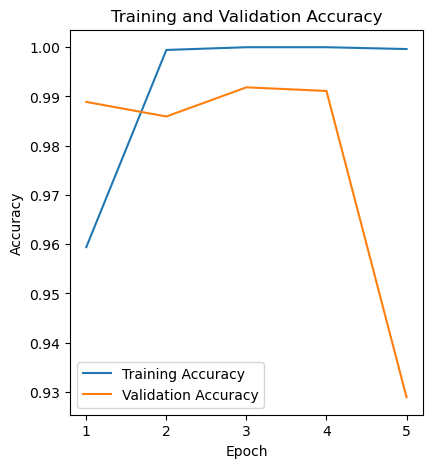

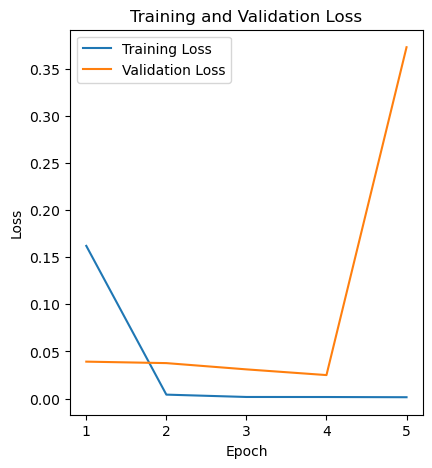

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(1, len(history.history['accuracy']) + 1)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.savefig('../images/inceptionv3-4-1-Accuracy.png')

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.title('Training and Validation Loss')

plt.savefig('../images/inceptionv3-4-2-Loss.png')